In [2]:
import numpy as np
import pykitti
from os import listdir
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

**Variaveis sobre o dataset**

In [5]:
test_name = 'test2020-07-24_01'
log_drone_name = 'log_drone.txt'
path_base = '../CloudPoints/'
path = f'{path_base}arrays/{test_name}'
list_files = []
dict_imgs = {}
for data in listdir(path):
    if not 'log' in data:
        file_data = f'{path}/{data}'
        dict_imgs[data.split('.')[0]] =  np.load(file_data)['arr_0']
    if 'voo' in data:
        log_voo_name = data
    if 'drone' in data:
        log_drone_name = data

**Lendo dados do voo**

In [6]:
df_log_voo = pd.read_csv(f'{path}/{log_voo_name}',header=None)[[1,2,3,4]]
df_log_voo.columns = ['X','Y','Z','timestamp']
df_log_voo = df_log_voo.groupby('timestamp').first()
df_log_voo.head()


,X,Y,Z
timestamp,,,
1595308207,13177.10,-41402.1,1617.820
1595308208,5246.64,-39692.3,1115.410
1595308209,-8598.09,-19504.4,987.817
1595308210,-8594.40,-19498.0,987.817
1595308211,12560.80,-39708.8,1617.820


**Lendo dados do drone**

In [7]:
data_log_drone = open(f'{path}/{log_drone_name}').read()
list_log_drone = json.loads(data_log_drone)

In [8]:
list_position = []
for data_drone in list_log_drone:
    aux = data_drone['position']
    aux['time'] = round(float(data_drone['time']))
    list_position.append(aux)
df_log_drone = pd.DataFrame(list_position)

In [9]:
df_log_drone = df_log_drone.groupby('time').first()
df_log_drone.head()

,x_val,y_val,z_val
time,,,
1595563518,0.0,0.0,3.068409
1595563519,0.0,0.0,2.979520
1595563524,0.0,0.0,2.508133
1595563525,0.0,0.0,2.489391
1595563526,0.0,0.0,2.412722


**Show data**

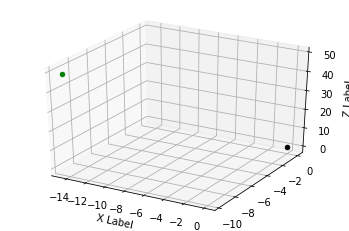

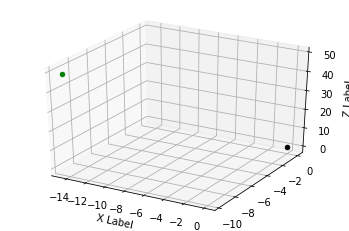

In [10]:

from IPython import display
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plane_location = None
drone_location = None
start_image = 0
count = start_image
for name_img in dict_imgs:    
    #cloud_point = np.concatenate((list_data[n_cloud],list_data[n_cloud+1],list_data[n_cloud+2]))
    cloud_point = dict_imgs[name_img]
    #print('count:',count)
    count += 1
    ax.clear()
    display.clear_output(wait=True) 
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    #ax.scatter(cloud_point[:,0], cloud_point[:,1], cloud_point[:,2], marker='o')
    if  int(name_img) in df_log_drone.index:
        drone_location = df_log_drone.loc[int(name_img)]
        ax.scatter(drone_location['y_val'],drone_location['z_val'],drone_location['x_val'],color='g')
        ax.scatter(0,0,0,color='black')
    else:
        continue
    #get plane location
    """
    if int(name_img) in df_log_voo.index:
        plane_location = df_log_voo.loc[int(name_img)]
    if  int(name_img) in df_log_drone.index:
        drone_location = df_log_drone.loc[int(name_img)]
    if (not plane_location is None) and (not drone_location is None):
        x_rel = plane_location['X'] - drone_location['x_val']
        y_rel = plane_location['Y'] - drone_location['y_val']
        z_rel = plane_location['Z'] - drone_location['z_val']
        ax.scatter(x_rel,y_rel,z_rel,color='r')
    """
    ax.set_xlabel('X Label');
    ax.set_zlabel('Z Label');

    display.display(plt.gcf())

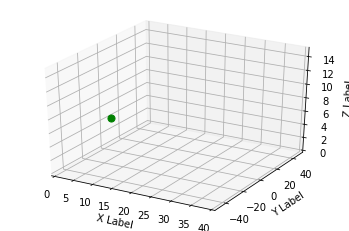

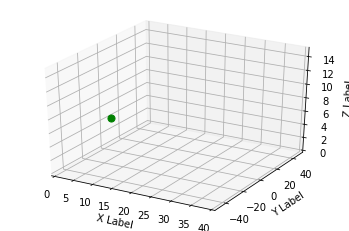

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df_log_drone)):
    ax.clear()
    plt.xlim(0,40)
    plt.ylim(-50,50)
    ax.set_zlim(0,15)
    display.clear_output(wait=True) 
    drone_location = df_log_drone.iloc[i]
    ax.scatter(drone_location['y_val']*-1,drone_location['x_val']*-1,drone_location['z_val']*-1,color='g',s=50)
    ax.set_xlabel('X Label');
    ax.set_zlabel('Z Label');
    ax.set_ylabel('Y Label');
    display.display(plt.gcf())
    
    #plt.zlim(0)

In [12]:
df_log_drone.max()

x_val    48.773331
y_val     0.000000
z_val     3.068409
dtype: float64

In [47]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


**Get log**

In [26]:
log_lidar = open(f'{path}/log_lidar.txt','r').read()
log_lidar

'1595395447.2986021595395448.2776521595395448.6896751595395450.3137281595395450.8207761595395451.8857161595395453.3607271595395453.7498461595395454.1747171595395454.7747231595395455.0407171595395455.4197341595395456.7897931595395457.0437791595395458.4227981595395460.0918361595395460.4118311595395460.7328391595395460.9138011595395461.4417861595395461.6927411595395462.049731595395462.3936821595395463.586691595395463.9297511595395465.3487921595395465.9007921595395467.2157311595395467.7187281595395468.0007051595395468.2287091595395469.833731595395470.0227251595395471.5487211595395471.839711595395472.9367951595395473.3078521595395474.6698551595395475.0288271595395475.3557951595395476.5918141595395477.0317311595395478.2986721595395479.7927621595395479.9987991595395480.2877891595395480.9198181595395481.1537891595395481.4778411595395483.6368091595395484.0273141595395485.4857671595395486.3687181595395487.1671521595395487.4146331595395487.9136521595395488.2846861595395490.5347761595395490.829838